<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/Model_Interpretation/GPy_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing GPy

In [1]:
!pip install --upgrade GPy

# Importing libraries

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import pylab as pb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



import GPy

Populating the interactive namespace from numpy and matplotlib


# Loading and encoding monthly data

In [3]:
Data = {}
Data['M1'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M1_transform_hourly_arrivals_dataset.csv')
Data['M2'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M2_transform_hourly_arrivals_dataset.csv')
Data['M3'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M3_transform_hourly_arrivals_dataset.csv')

In [4]:
M1_columns = Data['M1'].columns[:-1]
M2_columns = Data['M2'].columns[:-1]
M3_columns = Data['M3'].columns[:-1]

In [5]:
# Encoding h and Day column
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
for key in Data.keys():
  Data[key]['h']=[int(t.split(':')[0]) for t in Data[key]['h']]
  Data[key]['Day']=[days[d] for d in Data[key]['Day']]

In [6]:
data={}

In [7]:
for i in range(1,4):
  data['M'+str(i)] = np.array(Data['M'+str(i)].copy())

In [8]:
data['M1'][:,:-1].shape

(311, 13)

In [9]:
X_M1,y_M1 = data['M1'][:,:-1] , np.array([[y] for y in data['M1'][:,-1]])

In [10]:
X_M1.shape , y_M1.shape

((311, 13), (311, 1))

# Modeling with GPy

- I have taken first 4/5 th data for training and rest for testing
- In the plots, there are red vertical lines. On the left of this line, it is for training data and on the right, it is for test data.

In [11]:
# Helper function to plot
def plot_model(model,visible_dims):
  nrows = len(visible_dims)//2 if len(visible_dims)%2==0 else len(visible_dims)//2+1
  #plt.figure(figsize=(8*nrows,10))
  #j=1
  for i,title in enumerate(visible_dims):
    #plt.subplot(nrows,2,j)
    #plt.tight_layout()
    model.plot(visible_dims=[i])
    plt.title(title)
    plt.show()
    #j+=1

# Month 1

In [12]:
X_M1_train,y_M1_train = X_M1[:4*len(X_M1)//5],y_M1[:4*len(X_M1)//5]

In [13]:
kernel = GPy.kern.RBF(X_M1.shape[1], variance=1.0, lengthscale=1.0)

In [14]:
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()

In [15]:
m1 = GPy.core.GP(X=X_M1_train, Y=y_M1_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m1)
#Predictions of counts of buses, including noise arising from Poisson noise


Name : gp
Objective : 581.8835310936274
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [16]:
#m1.randomize()
m1.optimize()
print (m1)


Name : gp
Objective : 422.232487608572
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  1.8592903185066105  |      +ve      |        
  rbf.lengthscale  |  10.824141588537934  |      +ve      |        


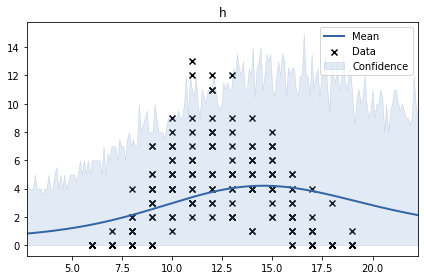

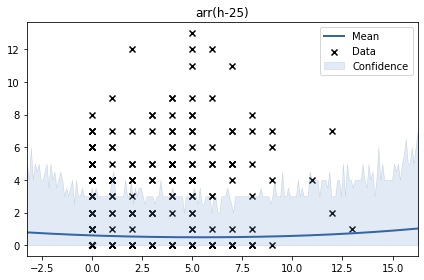

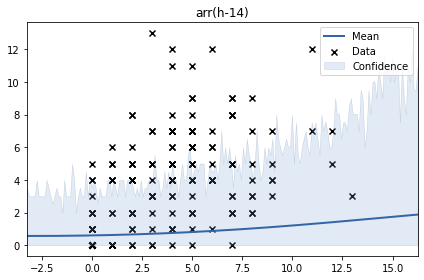

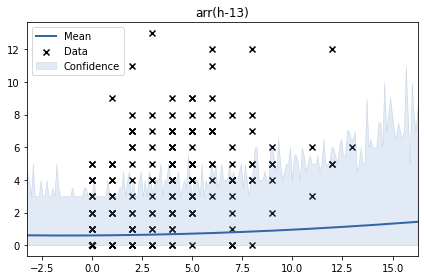

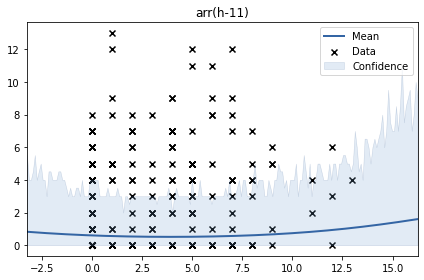

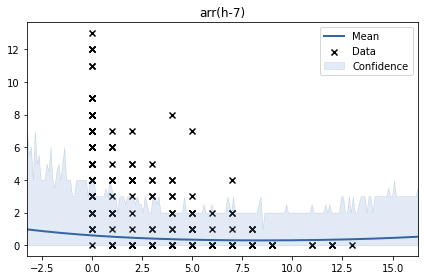

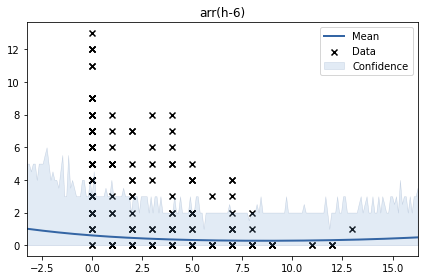

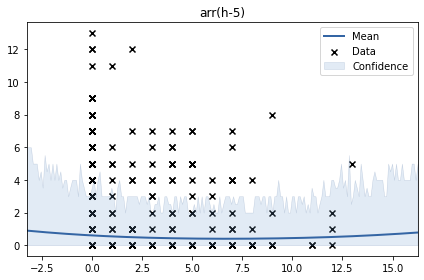

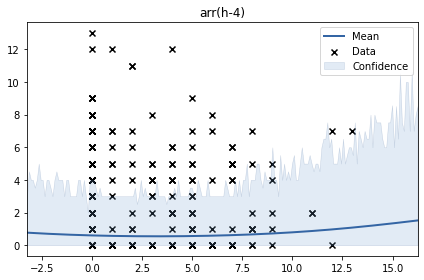

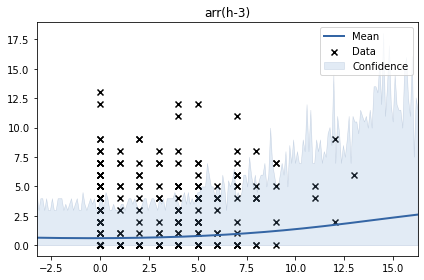

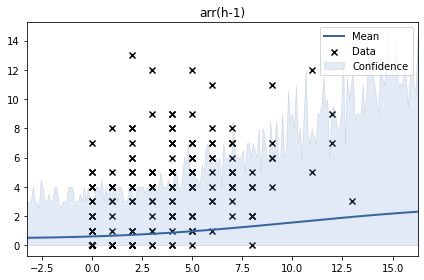

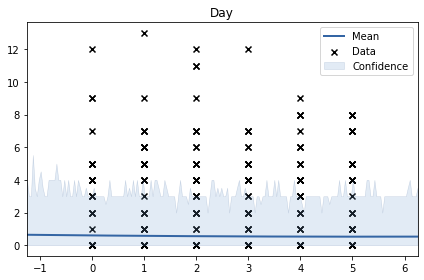

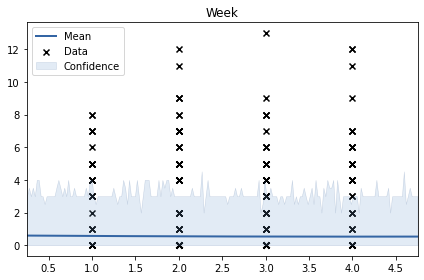

In [17]:
plot_model(model=m1,visible_dims=M1_columns)

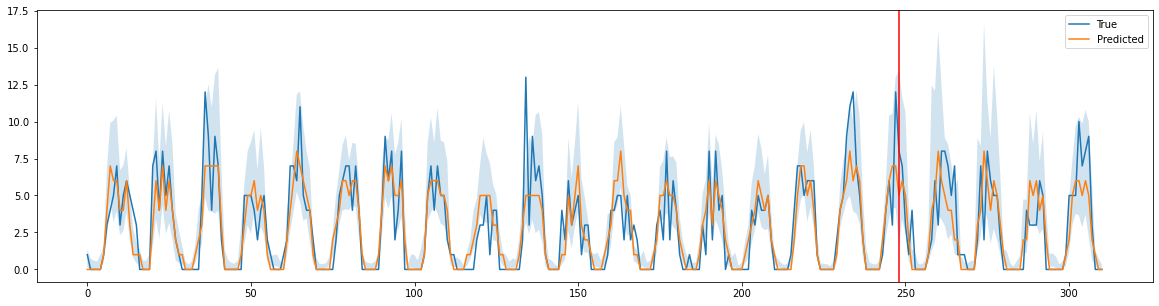

In [18]:
f_mean, f_var = m1._raw_predict(np.array(X_M1))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

# For test sets
plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M1.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M1)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M1)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.

# Month 2

In [19]:
X_M2,y_M2 = data['M2'][:,:-1] , np.array([[y] for y in data['M2'][:,-1]])
X_M2_train,y_M2_train = X_M2[:4*len(X_M2)//5],y_M2[:4*len(X_M2)//5]

In [20]:
kernel = GPy.kern.RBF(X_M2.shape[1], variance=1.0, lengthscale=1.0)
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()

In [21]:
m2 = GPy.core.GP(X=X_M2_train, Y=y_M2_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m2)
#Predictions of counts of buses, including noise arising from Poisson noise


Name : gp
Objective : 585.6006844569131
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [22]:
#m2.randomize()
m2.optimize()
print (m2)


Name : gp
Objective : 434.25591973505215
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  1.3480149424109942  |      +ve      |        
  rbf.lengthscale  |    10.0636929641135  |      +ve      |        


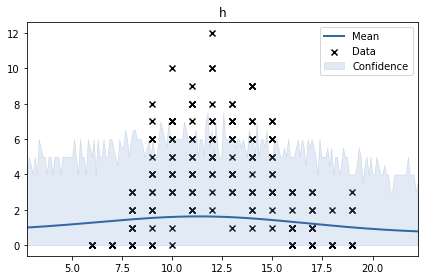

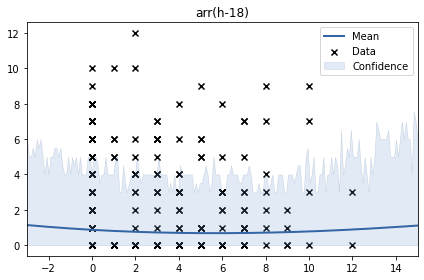

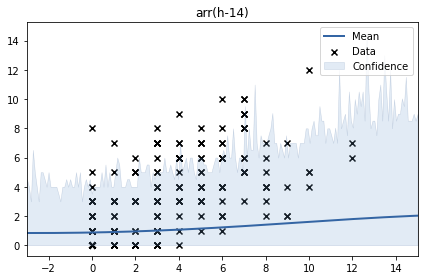

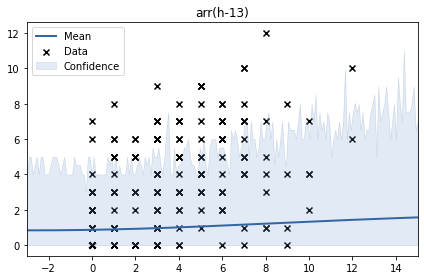

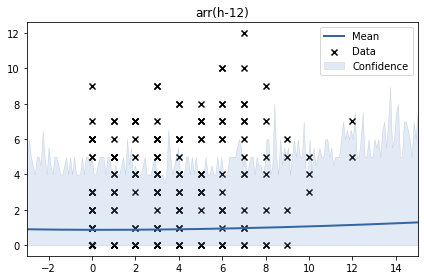

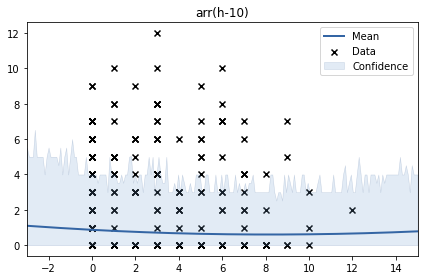

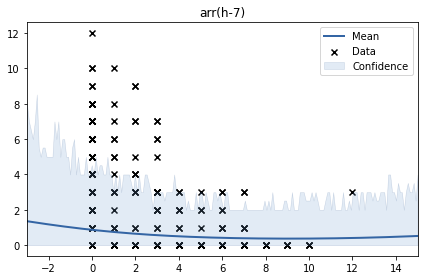

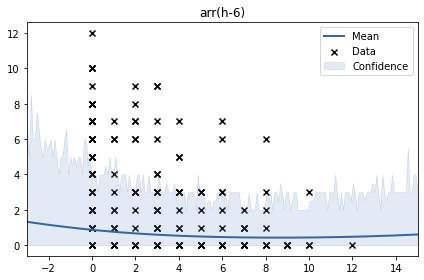

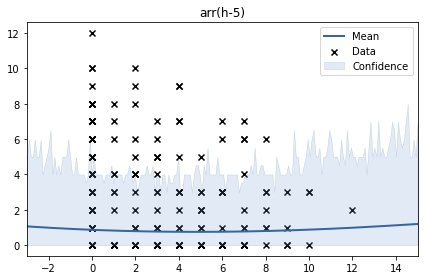

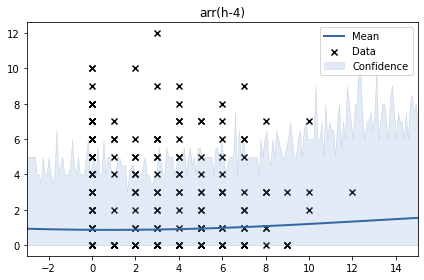

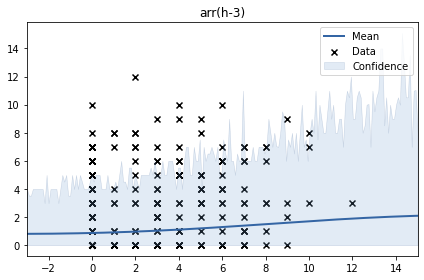

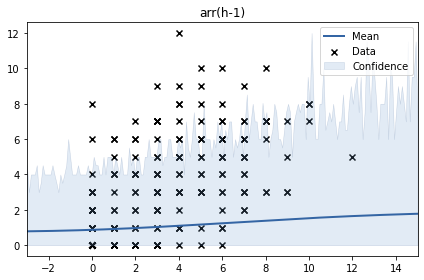

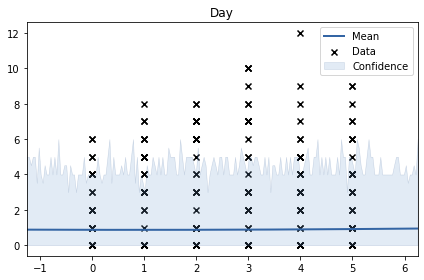

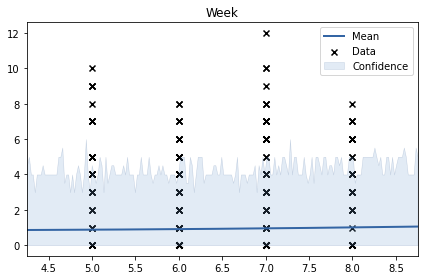

In [23]:
plot_model(model=m2,visible_dims=M2_columns)

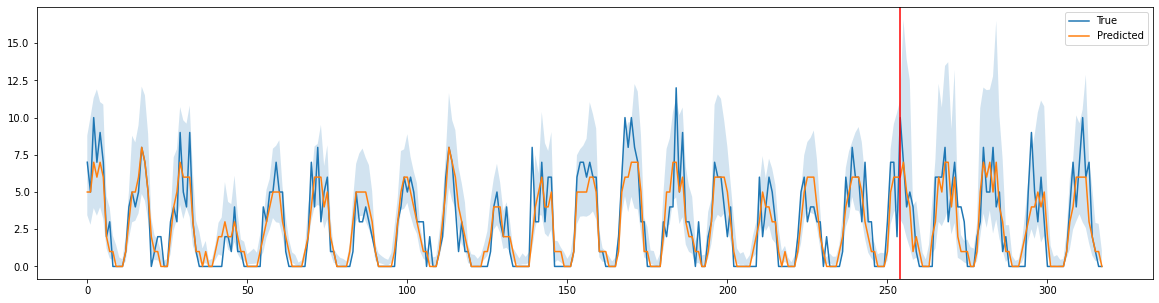

In [24]:
f_mean, f_var = m2._raw_predict(np.array(X_M2))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M2.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M2)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M2)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.

# Month 3

In [25]:
X_M3,y_M3 = data['M3'][:,:-1] , np.array([[y] for y in data['M3'][:,-1]])
X_M3_train,y_M3_train = X_M3[:2*len(X_M3)//3],y_M3[:2*len(X_M3)//3]

In [26]:
kernel = GPy.kern.RBF(X_M3.shape[1], variance=1.0, lengthscale=1.0)

In [27]:
m3 = GPy.core.GP(X=X_M3_train, Y=y_M3_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m3)


Name : gp
Objective : 582.4099414255511
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [28]:
#m3.randomize()
m3.optimize()
print (m3)


Name : gp
Objective : 429.81138311330994
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  2.4572858257816064  |      +ve      |        
  rbf.lengthscale  |   13.77522305898679  |      +ve      |        


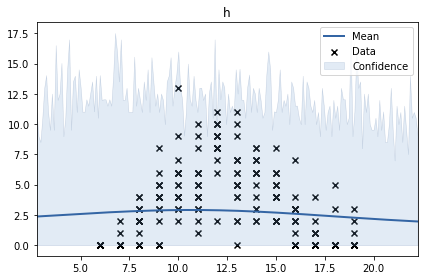

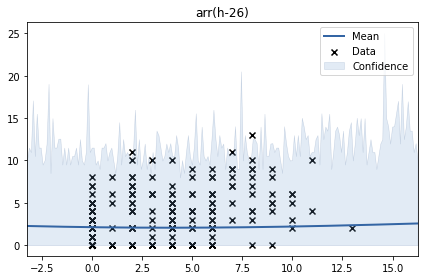

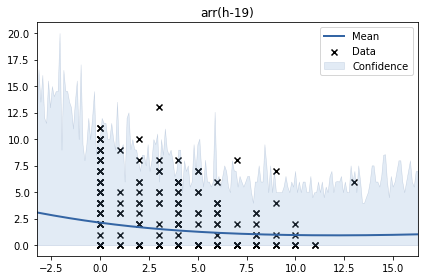

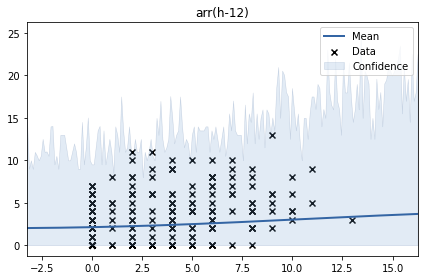

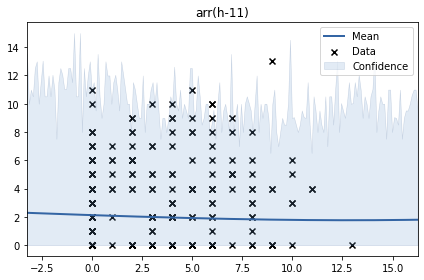

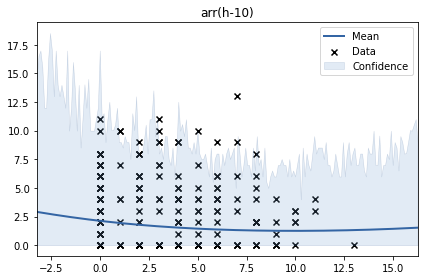

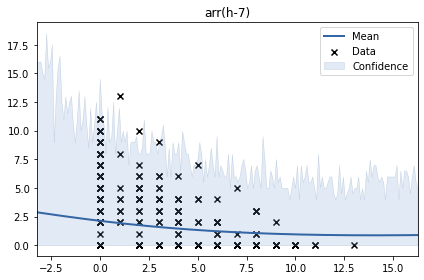

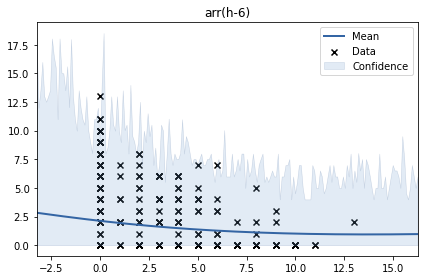

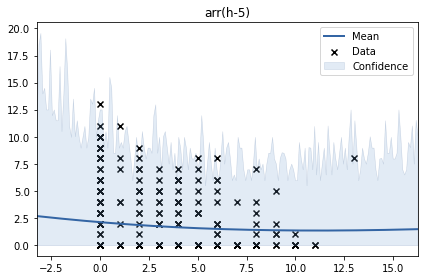

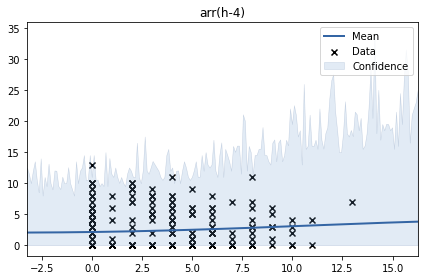

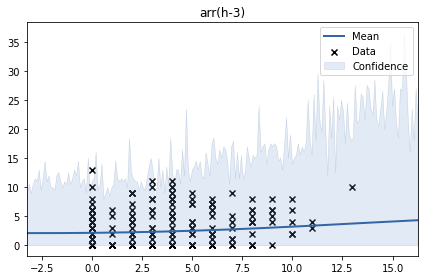

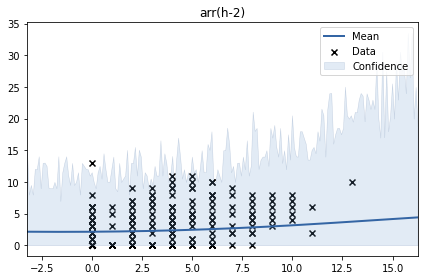

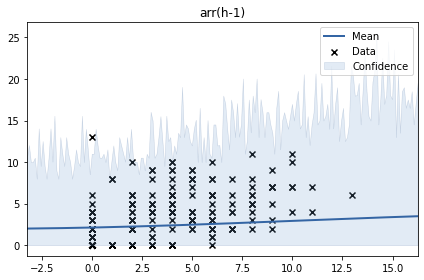

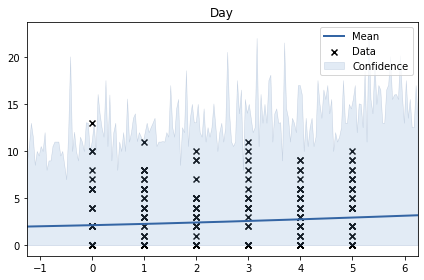

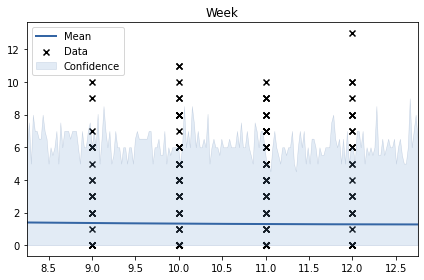

In [29]:
plot_model(model=m3,visible_dims=M3_columns)

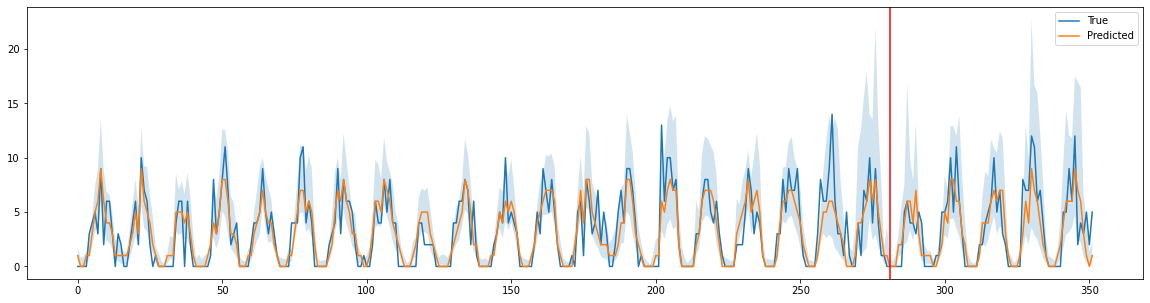

In [30]:
f_mean, f_var = m3._raw_predict(np.array(X_M3))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M3.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M3)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M3)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.

In [31]:
import random
from random import sample

random.seed(1)

# Model Interpretation

- Hourly arrival counts for each month of quarter 1 in retail is characterized by autoregressive time lags, hourly, daily, weekly variations along with inherent unpredictability.

- The counts are believed to follow a Poisson distribution and are considered pretty low for the dataset in hand, the maximum counts for month 1,2 and 3 being 13,12 and 13 respectively. Thus the Laplace approximation is used to fit the Poisson process regression into a Gaussian Process framework. 

In [32]:
print("Max Counts: %d, %d and %d" %(max(y_M1_train),max(y_M2_train),max(y_M3_train)))

Max Counts: 13, 12 and 13


- We can see from the graphs below that the intensity of the arrival counts changes many times in a day based on the busy hours. So to approximate to Gaussian Processes we must make some assumptions about the intensity, we do this by defining a radial basis function (RBF) kernel.

### month 1

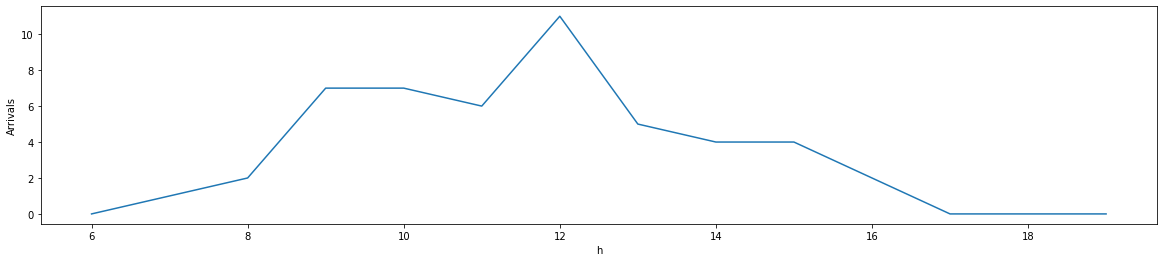

In [33]:
w1=sample(list(X_M1_train.transpose()[list(M1_columns).index('Week')]),1)[0]
d1=sample(list(X_M1_train.transpose()[list(M1_columns).index('Day')]),1)[0]

df_s1=Data['M1'][(Data['M1']['Week']==w1) & (Data['M1']['Day']==d1)]
df_s1.set_index('h',inplace=True)

df_s1['arr(h)'].plot(figsize=(20,4))
plt.ylabel('Arrivals')
plt.show()

### month 2

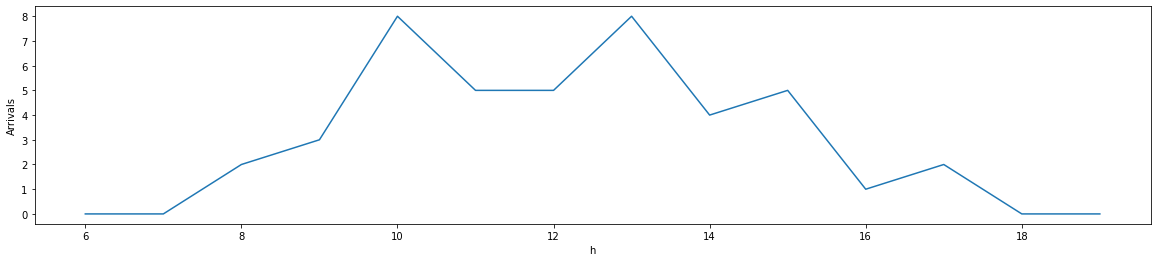

In [34]:
w2=sample(list(X_M2_train.transpose()[list(M2_columns).index('Week')]),1)[0]
d2=sample(list(X_M2_train.transpose()[list(M2_columns).index('Day')]),1)[0]

df_s2=Data['M2'][(Data['M2']['Week']==w2) & (Data['M2']['Day']==d2)]
df_s2.set_index('h',inplace=True)

df_s2['arr(h)'].plot(figsize=(20,4))
plt.ylabel('Arrivals')
plt.show()

### month 3

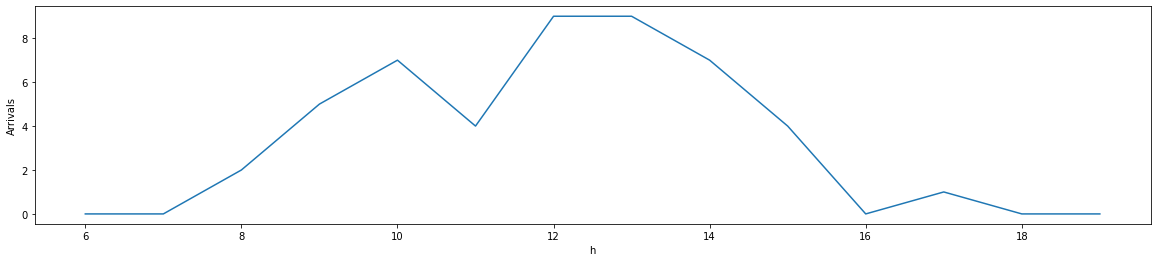

In [35]:
w3=sample(list(X_M3_train.transpose()[list(M3_columns).index('Week')]),1)[0]
d3=sample(list(X_M3_train.transpose()[list(M3_columns).index('Day')]),1)[0]

df_s3=Data['M3'][(Data['M3']['Week']==w3) & (Data['M3']['Day']==d3)]
df_s3.set_index('h',inplace=True)

df_s3['arr(h)'].plot(figsize=(20,4))
plt.ylabel('Arrivals')
plt.show()

- By using RBF kernel we make a smoothness assumption about the intensity parameter throughout time which says that data 'close' to one another shares similar properties. Thus in our case we are making the assumption that the hours that are close to one another have a similar number of customer arrival counts.

- The closeness information we get for the 3 months of data by using GPy is:
  - For month 1, lengthscale = 10.8; If we move around 11 hours,  the intensity of arrival counts shares almost nothing with the intensity of previous 10 hours.
  - For month 2, lengthscale = 10; If we move 10 hours,  the intensity of arrival counts shares almost nothing with the intensity of previous 9 hours.
  - For month 3, lengthscale = 13.8; If we move around 14 hours,  the intensity of arrival counts shares almost nothing with the intensity of previous 13 hours.

- 